In [29]:
import pandas as pd


df = pd.read_csv('Speed_Dating.csv',encoding='latin1')



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE

In [3]:
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
df.head(3)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [5]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

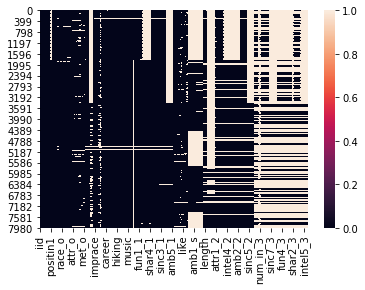

In [6]:
#To check nan values are available or  not:
sns.heatmap(df.isnull())

In [7]:
#Counting Null Values
pd.options.display.max_rows = 1000
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [150]:
#what women want in a partner
fsw = df[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].dropna()
fsw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#what men want in a partner
msw = df[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].dropna()
msw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']

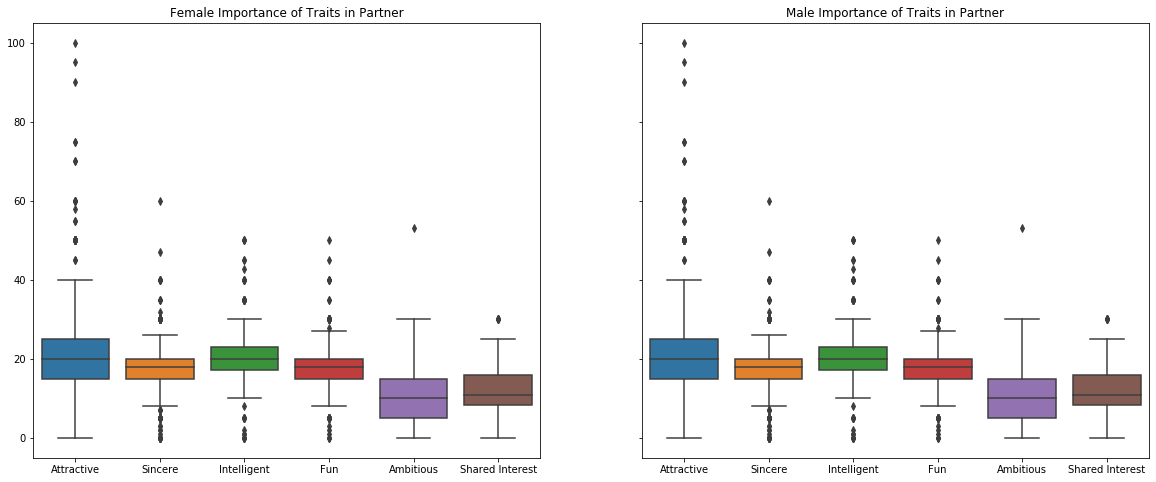

In [59]:
fig, (ax1,ax2) = plt.subplots(figsize=(20,8), ncols=2,  sharey=True)
ax1 = sns.boxplot(data=fsw, ax=ax1)
ax2 = sns.boxplot(data=msw, ax=ax2)
ax1.set_title("Female Importance of Traits in Partner")
ax2.set_title("Male Importance of Traits in Partner")
plt.show()

In [60]:
#For women intelligence is first, next looks, fun, and sincerity are about the same, then ambition is fifth, and shared interests with a partner is last.

#For men attraction is first, intelligence is second, then sincerity and fun are about equal, then shared interests with a partner is fifth, and ambition is last.





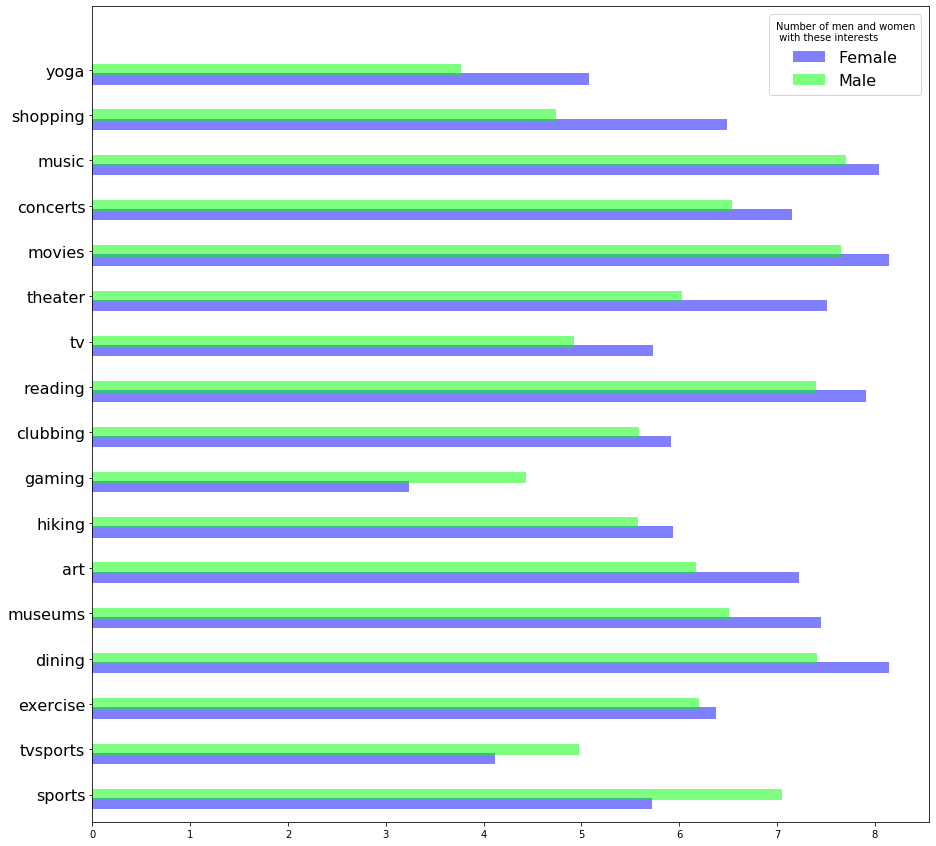

In [61]:
interests=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
intact = df.groupby(['gender']).mean()[interests].values

plot4= plt.figure(figsize=(15,15))
plot4= plt.barh(np.arange(0,2*intact.shape[1],2)-0.2,intact[0,:], height=0.5,color=[0,0,1],alpha=0.5,label='Female')
plot4 = plt.barh(np.arange(0,2*intact.shape[1],2)+0.2,intact[1,:], height=0.5,color=[0,1,0],alpha=0.5,label='Male')
plot4 = plt.yticks(np.arange(0,2*intact.shape[1],2)+0.2,interests,fontsize=16)
plot4 = plt.ylim(-1,2*intact.shape[1]+1)
plot4 = plt.legend(loc=0,fontsize=16)
plot4.set_title('Number of men and women\n with these interests');

In [11]:
def plot_correlated(df1, size=11):
    """
    Function to show plot of correlation between the data columns
    data : the data from pandas Dataframe
    size : the horizontal and vertical size of the plot
    
    Result : blue - cyan - yellow - red -darkred = less to more correlated columns = 0 ---- 1 
    """
    corr = df1.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

,gender,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr,sinc,intel,fun,amb,shar,dec,age_o,match
gender,1.000000,0.347265,-0.126675,-0.085051,0.018089,-0.347811,-0.114216,0.122524,0.034376,-0.065572,0.053593,-0.105734,0.023928,0.115111,-0.071318,0.002698
attr1_1,0.347265,1.000000,-0.442300,-0.351883,-0.214511,-0.471027,-0.420974,0.038817,0.032765,0.018478,0.054550,0.006010,0.033774,-0.015366,-0.061168,0.012502
sinc1_1,-0.126675,-0.442300,1.000000,-0.086419,-0.176443,-0.009771,0.035952,-0.012535,-0.014117,0.000469,-0.003705,0.011344,0.004235,0.026454,0.027049,-0.038875
intel1_1,-0.085051,-0.351883,-0.086419,1.000000,-0.126313,-0.051429,-0.114373,-0.022221,-0.055417,-0.050866,-0.065843,-0.051525,-0.052019,-0.010899,-0.013739,0.010161
fun1_1,0.018089,-0.214511,-0.176443,-0.126313,1.000000,-0.033210,-0.184815,-0.001321,0.003014,-0.013135,-0.019540,-0.049641,-0.047418,0.000458,-0.028837,0.041312
amb1_1,-0.347811,-0.471027,-0.009771,-0.051429,-0.033210,1.000000,0.123300,-0.020569,0.058723,0.087747,0.031950,0.131985,0.032123,-0.023300,0.080560,0.008474
shar1_1,-0.114216,-0.420974,0.035952,-0.114373,-0.184815,0.123300,1.000000,-0.017741,-0.046575,-0.055949,-0.040955,-0.045785,0.000454,0.039664,0.045637,-0.045355
attr,0.122524,0.038817,-0.012535,-0.022221,-0.001321,-0.020569,-0.017741,1.000000,0.392553,0.377397,0.582717,0.349177,0.479382,0.484893,-0.049977,0.261612
sinc,0.034376,0.032765,-0.014117,-0.055417,0.003014,0.058723,-0.046575,0.392553,1.000000,0.662004,0.498779,0.454415,0.387202,0.201722,-0.000657,0.164287
intel,-0.065572,0.018478,0.000469,-0.050866,-0.013135,0.087747,-0.055949,0.377397,0.662004,1.000000,0.492232,0.620454,0.390365,0.208293,0.031763,0.171733


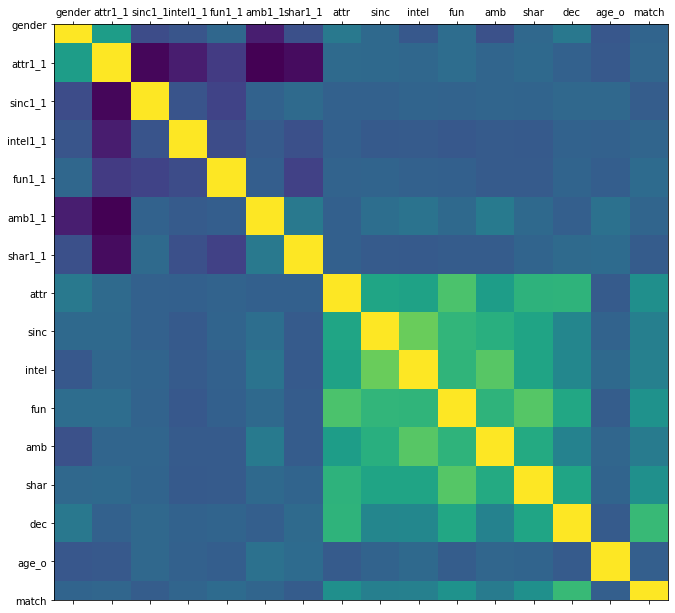

In [13]:
plot_correlated(df1)
df1.corr()

In [18]:
#Men (gender = 1) seem to have a preference for attractive partners (attr1_1) while women (gender = 0) seem to have a preference for ambitious partners (amb1_1)!


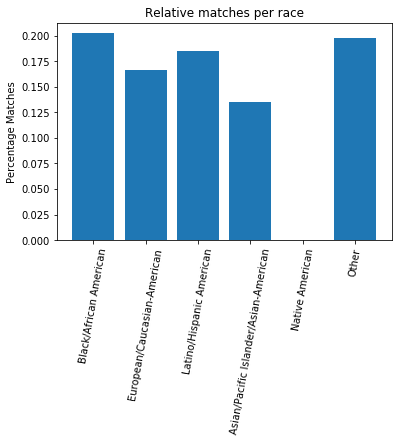

In [17]:

race_list = [1,2,3,4,6]
result = {}

for race in race_list:
    result[race] = len(df[(df['match'] ==1) & (df['race'] == race)]) / len(df[df['race'] == race])

plt.figure()
plt.bar(list(result.keys()),list(result.values()))
plt.xticks(np.arange(1,7),('Black/African American',
'European/Caucasian-American',
'Latino/Hispanic American',
'Asian/Pacific Islander/Asian-American',
'Native American',
'Other'),rotation=80)
plt.title('Relative matches per race')
plt.ylabel('Percentage Matches')
plt.show()

In [33]:
dating_data=df[df['samerace'] ==1]
dating_data =dating_data.replace(np.nan,0)

Text(0, 0.5, 'Frequency')

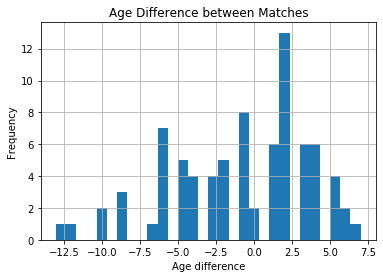

In [51]:
matches = df[df['match'] ==1]
age_diff = matches.age - matches.age_o
plt.figure()
age_diff.hist(bins=30)
plt.title('Age Difference between Matches')
plt.xlabel('Age difference')
plt.ylabel('Frequency')

Text(0.5, 1, 'Importance of attractiveness vs. ambition in men and women')

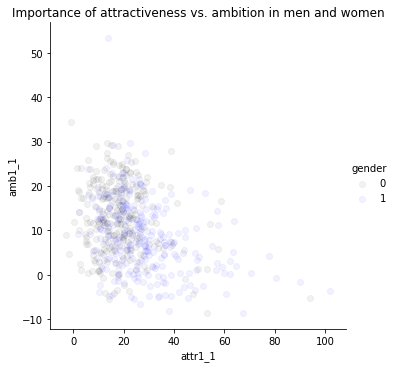

In [55]:

sns.lmplot("attr1_1", "amb1_1",
           data=df, hue='gender', fit_reg=False,
           x_jitter=10, y_jitter=10,
           palette=['black', 'blue'],
           scatter_kws={'alpha':.05})
plt.title('Importance of attractiveness vs. ambition in men and women')

In [90]:
# removing interests
date = df.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

In [91]:
# encoding unrequited love as a new column
date['url']=np.where(((df['dec_o']==0) & (df['dec']==1))|((df['dec']==0) & (df['dec_o']==1)),1,0)

Text(0.5, 0, 'Broken Heart')

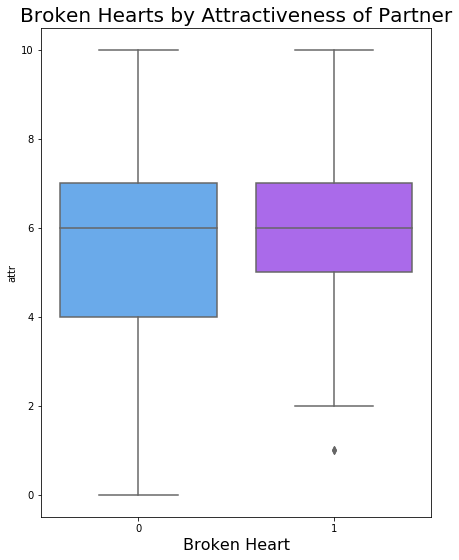

In [92]:

# looking at url by attractiveness
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='attr', data=date, palette='cool')
plt.title('Broken Hearts by Attractiveness of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)

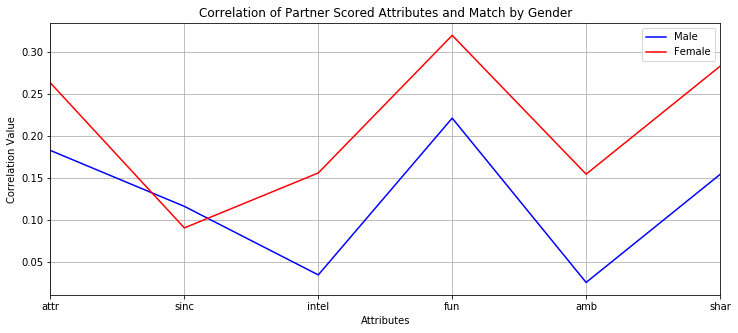

In [93]:
## GENDER

interest_corr_m = df.loc[df['gender']==0].corr()['match']['attr':'shar']
#print(interest_corr_m)
interest_corr_f = df.loc[df['gender']==1].corr()['match']['attr':'shar']
#print(interest_corr_f)

plt.figure(figsize=(12,5))
plt.title('Correlation of Partner Scored Attributes and Match by Gender')
plt.xlabel('Attributes')
plt.ylabel('Correlation Value')

ax1 = interest_corr_m.plot(color='blue', grid=True, label='Male')
ax2 = interest_corr_f.plot(color='red', grid=True, label='Female')

plt.legend()
plt.show()

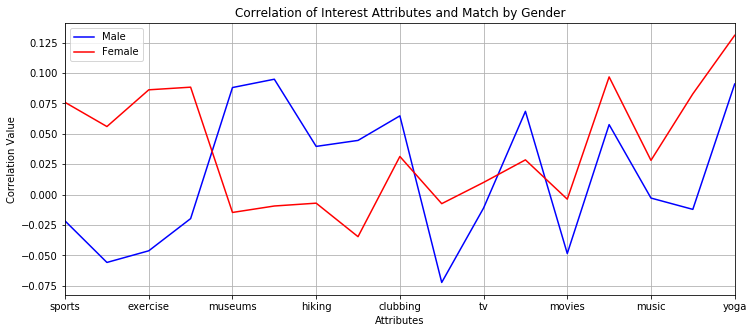

In [80]:
interest_corr_m = df.loc[df['gender']==0].corr()['match']['sports':'yoga']
interest_corr_f = df.loc[df['gender']==1].corr()['match']['sports':'yoga']

plt.figure(figsize=(12,5))
plt.title('Correlation of Interest Attributes and Match by Gender')
plt.xlabel('Attributes')
plt.ylabel('Correlation Value')

ax1 = interest_corr_m.plot(color='blue', grid=True, label='Male')
ax2 = interest_corr_f.plot(color='red', grid=True, label='Female')

labels = ['sports','tv sports','excersice','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga',]

plt.legend()
plt.show()

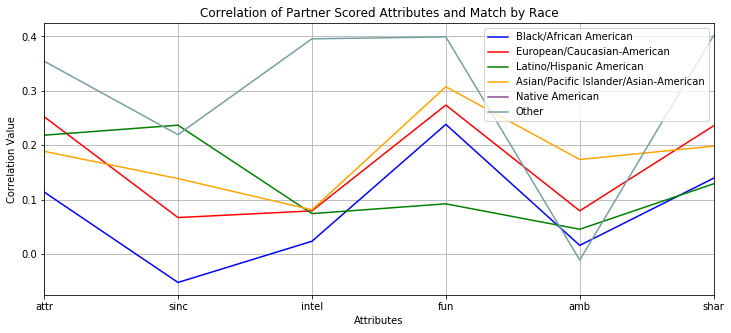

In [86]:

## RACE

interest_corr_1 = df.loc[df['race']==1].corr()['match']['attr':'shar']
interest_corr_2 = df.loc[df['race']==2].corr()['match']['attr':'shar']
interest_corr_3 = df.loc[df['race']==3].corr()['match']['attr':'shar']
interest_corr_4 = df.loc[df['race']==4].corr()['match']['attr':'shar']
interest_corr_5 = df.loc[df['race']==5].corr()['match']['attr':'shar']
interest_corr_6 = df.loc[df['race']==6].corr()['match']['attr':'shar']

plt.figure(figsize=(12,5))
plt.title('Correlation of Partner Scored Attributes and Match by Race')
plt.xlabel('Attributes')
plt.ylabel('Correlation Value')

ax1 = interest_corr_1.plot(color='blue', grid=True, label='Black/African American')
ax2 = interest_corr_2.plot(color='red', grid=True, label='European/Caucasian-American')
ax3 = interest_corr_3.plot(color='green', grid=True, label='Latino/Hispanic American')
ax4 = interest_corr_4.plot(color='orange', grid=True, label='Asian/Pacific Islander/Asian-American')
ax5 = interest_corr_5.plot(color='#88498F', grid=True, label='Native American')
ax6 = interest_corr_6.plot(color='#779FA1', grid=True, label='Other')

plt.legend()
plt.show()

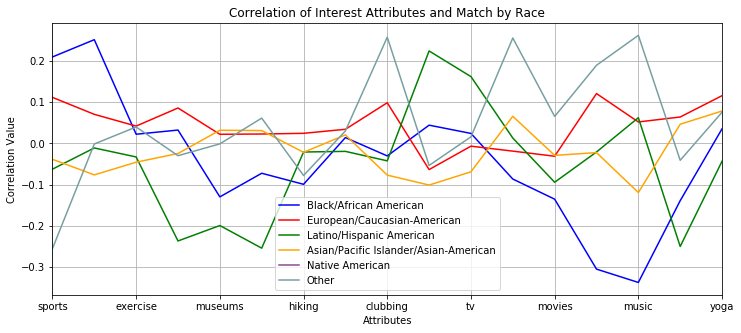

In [85]:
## RACE

interest_corr_1 = df.loc[df['race']==1].corr()['match']['sports':'yoga']
interest_corr_2 = df.loc[df['race']==2].corr()['match']['sports':'yoga']
interest_corr_3 = df.loc[df['race']==3].corr()['match']['sports':'yoga']
interest_corr_4 =df.loc[df['race']==4].corr()['match']['sports':'yoga']
interest_corr_5 = df.loc[df['race']==5].corr()['match']['attr':'shar']
interest_corr_6 = df.loc[df['race']==6].corr()['match']['sports':'yoga']

plt.figure(figsize=(12,5))
plt.title('Correlation of Interest Attributes and Match by Race')
plt.xlabel('Attributes')
plt.ylabel('Correlation Value')

ax1 = interest_corr_1.plot(color='blue', grid=True, label='Black/African American')
ax2 = interest_corr_2.plot(color='red', grid=True, label='European/Caucasian-American')
ax3 = interest_corr_3.plot(color='green', grid=True, label='Latino/Hispanic American')
ax4 = interest_corr_4.plot(color='orange', grid=True, label='Asian/Pacific Islander/Asian-American')
ax5 = interest_corr_5.plot(color='#88498F', grid=True, label='Native American')
ax6 = interest_corr_6.plot(color='#779FA1', grid=True, label='Other')

labels = ['sports','tv sports','excersice','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga',]

plt.legend()
plt.show()

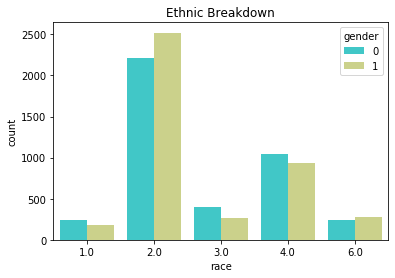

In [44]:

sns.countplot(x="race", data=df, hue='gender', palette="rainbow")
plt.title('Ethnic Breakdown')
plt.show()

 The top 20 most popular ones... over 200 Countries


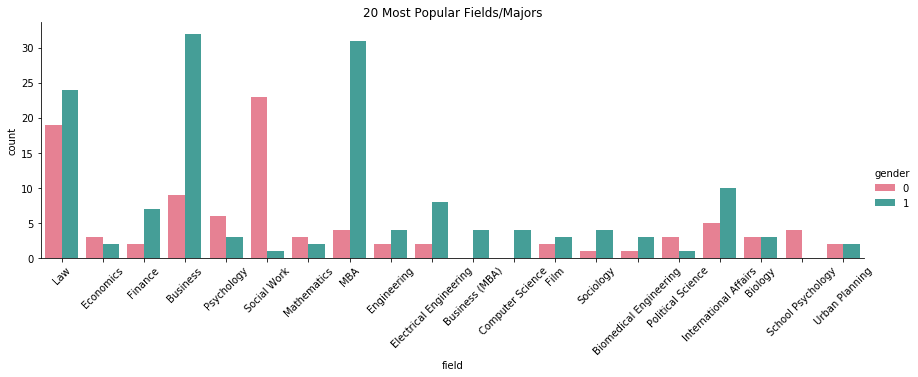

In [50]:
print(" The top 20 most popular ones... over 200 Countries")

df = df.groupby(['iid']).first()

df['field'] =df['field'].replace('business', 'Business').replace('law','Law')

top_10_fields = df.field.value_counts().head(n=20)

top_10_fields = df.loc[df.field.isin(list(top_10_fields.index)), :]

g = sns.factorplot(x="field", hue='gender', data=top_10_fields, 
               kind='count',size=4, aspect=3, palette="husl")
g.set_xticklabels(rotation=45)
plt.title('20 Most Popular Fields/Majors')
plt.show()

In [151]:
# Selecting the the columns that need
dating = df[["gender", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr", "sinc", "intel", "fun", "amb", "shar", "dec",'age_o','match']]

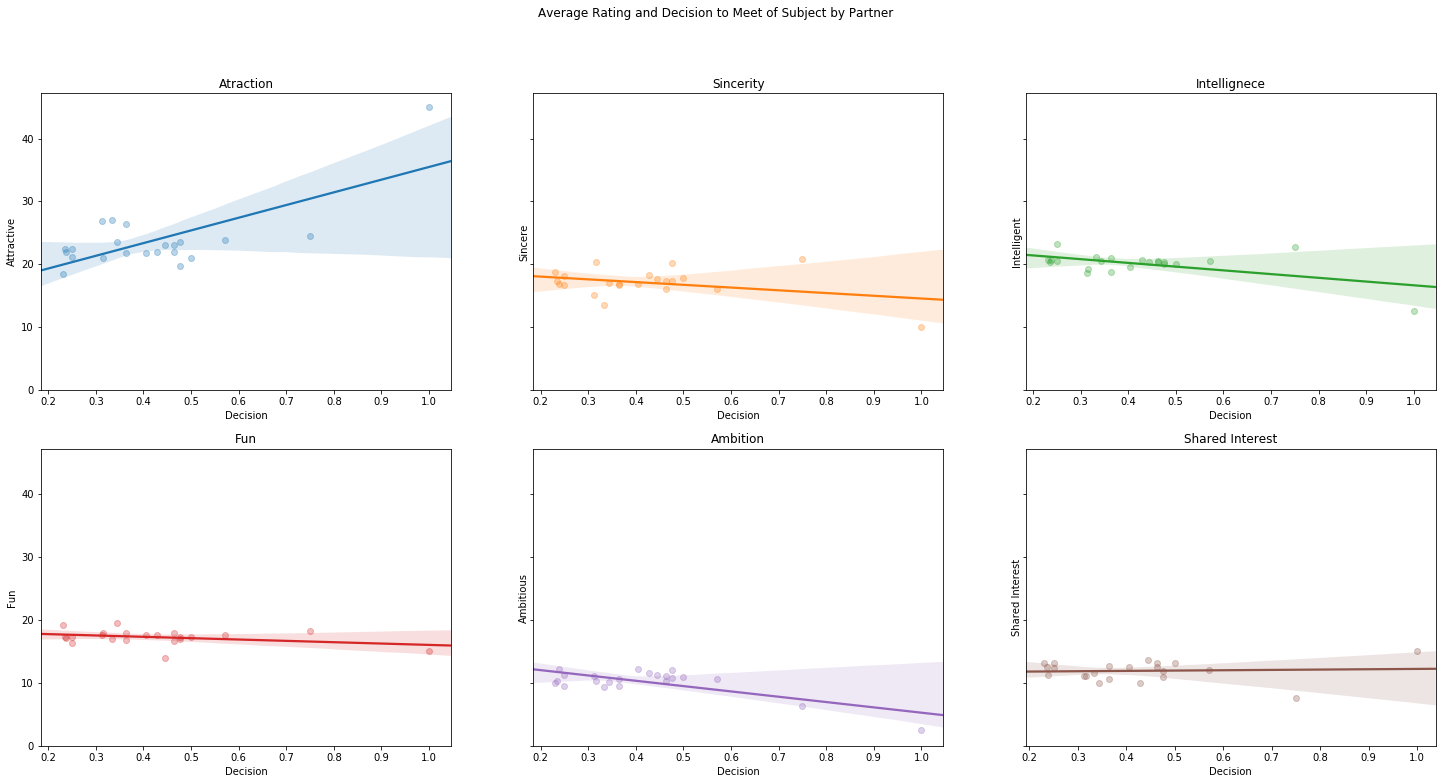

In [152]:
#average partner rating of subject and decision to meet
atpr = df.groupby('id')['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1','dec'].mean()
atpr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Decision']

fig, axes = plt.subplots(2,3, figsize=(25,12), sharey=True)
sns.regplot(x=atpr['Decision'], y=atpr['Attractive'], scatter_kws={'alpha':0.3}, ax=axes[0,0]).set_title('Atraction')
sns.regplot(x=atpr['Decision'], y=atpr['Sincere'], scatter_kws={'alpha':0.3}, ax=axes[0,1]).set_title('Sincerity')
sns.regplot(x=atpr['Decision'], y=atpr['Intelligent'], scatter_kws={'alpha':0.3}, ax=axes[0,2]).set_title('Intellignece')
sns.regplot(x=atpr['Decision'], y=atpr['Fun'], scatter_kws={'alpha':0.3}, ax=axes[1,0]).set_title('Fun')
sns.regplot(x=atpr['Decision'], y=atpr['Ambitious'], scatter_kws={'alpha':0.3}, ax=axes[1,1]).set_title('Ambition')
sns.regplot(x=atpr['Decision'], y=atpr['Shared Interest'], scatter_kws={'alpha':0.3}, ax=axes[1,2]).set_title('Shared Interest')
plt.suptitle('Average Rating and Decision to Meet of Subject by Partner')
plt.show()

In [153]:
att_r = np.corrcoef(atpr['Decision'], atpr['Attractive'])[0, 1]
sin_r = np.corrcoef(atpr['Decision'], atpr['Sincere'])[0, 1]
int_r = np.corrcoef(atpr['Decision'], atpr['Intelligent'])[0, 1]
fun_r = np.corrcoef(atpr['Decision'], atpr['Fun'])[0, 1]
amb_r = np.corrcoef(atpr['Decision'], atpr['Ambitious'])[0, 1]
sha_r = np.corrcoef(atpr['Decision'], atpr['Shared Interest'])[0, 1]
print('Correlation between meeting again and trait ratings:\nAttractive: {}'.format(round(att_r,2)))
print('Sincere: {}'.format(round(sin_r,2)))
print('Intelligent: {}'.format(round(int_r,2)))
print('Fun: {}'.format(round(fun_r,2)))
print('Ambitious: {}'.format(round(amb_r,2)))
print('Shared Interest: {}'.format(round(sha_r,2)))

Correlation between meeting again and trait ratings:
Attractive: 0.7
Sincere: -0.34
Intelligent: -0.54
Fun: -0.33
Ambitious: -0.72
Shared Interest: 0.06


In [88]:
#Choosing relevant data relating to gender, desired attributes, rated attributes and decisions of participants
df1 = df[["gender", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr", "sinc", "intel", "fun", "amb", "shar", "dec",'age_o','match']]

#Removing rows containing empty cells and non-numberical values
df1.replace(["NaN", 'NaT'], np.nan, inplace = True)
df1 = df1.dropna()

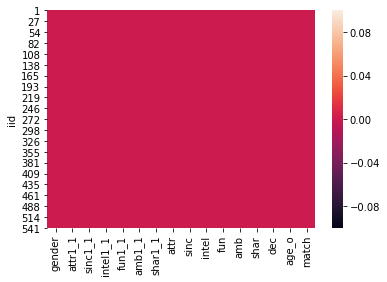

In [89]:
#To check nan values are available or  not:
sns.heatmap(df1.isnull())

<Figure size 720x720 with 0 Axes>

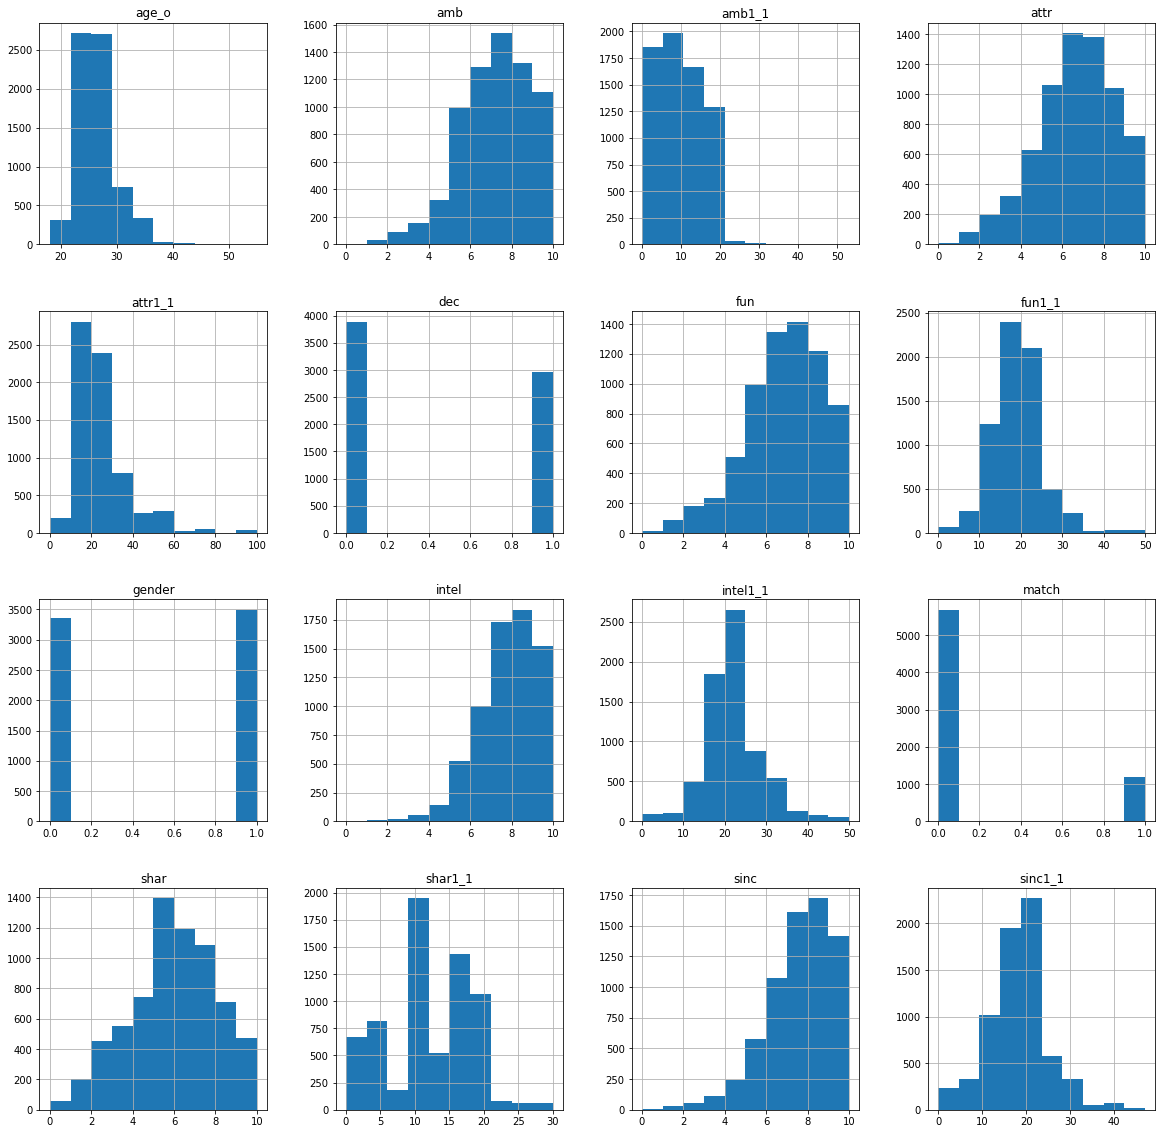

In [22]:
# Plotting the distribution of numerical and boolean categories
fig = plt.figure(figsize=(10,10))
df1.hist(figsize=(20,20));

In [13]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6852 entries, 0 to 8377
Data columns (total 16 columns):
gender      6852 non-null int64
attr1_1     6852 non-null float64
sinc1_1     6852 non-null float64
intel1_1    6852 non-null float64
fun1_1      6852 non-null float64
amb1_1      6852 non-null float64
shar1_1     6852 non-null float64
attr        6852 non-null float64
sinc        6852 non-null float64
intel       6852 non-null float64
fun         6852 non-null float64
amb         6852 non-null float64
shar        6852 non-null float64
dec         6852 non-null int64
age_o       6852 non-null float64
match       6852 non-null int64
dtypes: float64(13), int64(3)
memory usage: 910.0 KB


In [51]:
#sns.distplot(df1['gender']==1, kde=False, rug=True,color="skyblue")
#sns.distplot(df1['gender']==0, kde=False, rug=True,color="blue")
#sb.distplot(df['petal_length'],kde = False)

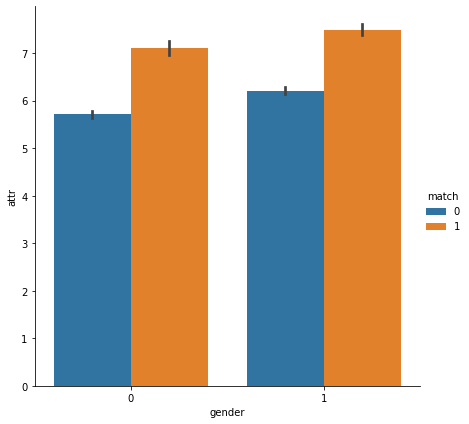

In [16]:
sns.factorplot(x='gender', y='attr', hue='match', data=df1, kind='bar', size=6)

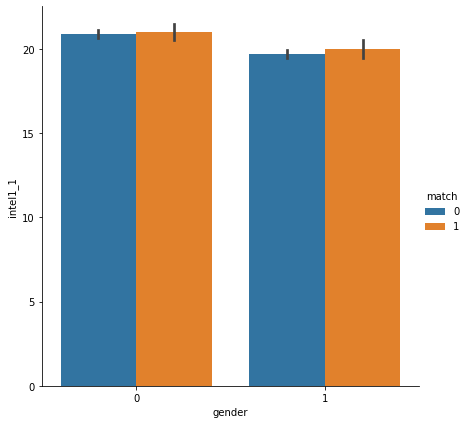

In [17]:
sns.factorplot(x='gender', y='intel1_1', hue='match', data=df1, kind='bar', size=6)

In [ ]:
# female model
import statsmodels.api as sm
attr=["gender", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr", "sinc", "intel", "fun", "amb", "shar", "dec",'age_o','match']
f = df1.loc[df.gender == 0, :]
f_data = f.copy()
f_data = f.dropna(subset=attr)
f_model = sm.OLS(f_data.dec, sm.add_constant(f_data.loc[:, attr]))
f_results = f_model.fit()
f_results.params
f_results.pvalues  
# all p-values are less than 0.05 which means all of features are significant in the model.

In [ ]:
# Now let's rank the features based on their importance in the model using RFE method, for women.
from sklearn.svm import SVC
estimator = SVC(kernel= "linear", C=0.1)
selector = RFE(estimator,1)
cfl=selector.fit(f_data.loc[:, attr], f_data.dec)
ranking_f=cfl.ranking_
feature_ranking_f=zip(ranking_f, attr)
list(feature_ranking_f)


In [ ]:
# male model
m = df.loc[df.gender == 1, :]
m_data = m.copy()
m_data = m_data.dropna(subset=attr)
m_model = sm.OLS(m_data.dec, sm.add_constant(m_data.loc[:, attr]))
m_results = m_model.fit()
m_results.params
m_results.pvalues


In [ ]:
# feature ranking for male participants.
estimator = SVC(kernel= "linear", C=0.1)
selector = RFE(estimator,1)
cfl=selector.fit(m_data.loc[:, attr], m_data.dec)
ranking_m=cfl.ranking_
feature_ranking_m=zip(ranking_m, attr)
list(feature_ranking_m)


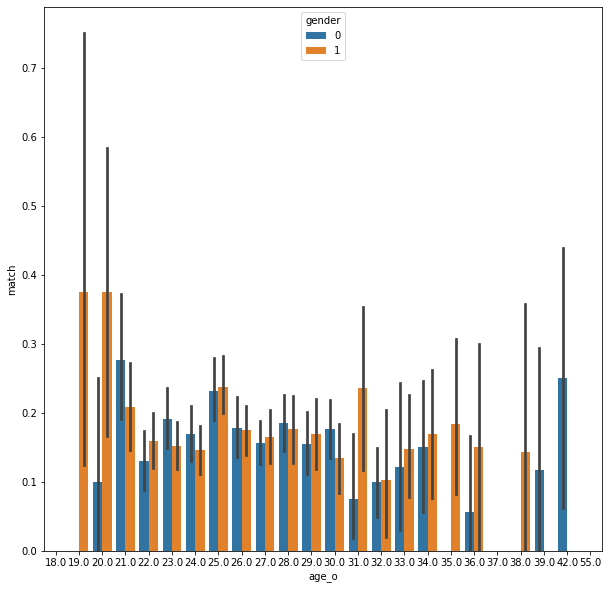

In [84]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x="age_o", y="match",hue='gender', data=df1)


In [ ]:
df1.describe()

In [89]:
df1.match.value_counts()

0    5673
1    1179
Name: match, dtype: int64

In [86]:
# Plotting function takes strings: axis names, title and a plot to apply them
def plotting(x_label, y_label, title, plot):
    plot.set_xlabel(x_label, fontsize=16)
    plot.set_ylabel(y_label, fontsize=16)
    plot.set_title(title, fontsize=18)
    plt.show()

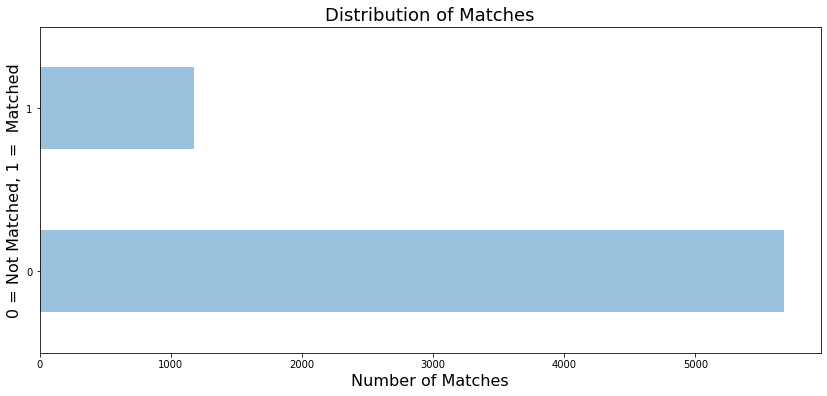

In [100]:
# Firstly, let's plot a simple distribution of how many people survived
plotting('Number of Matches', '0 = Not Matched, 1 =  Matched', "Distribution of Matches", 
         df1['match'].value_counts().plot(kind='barh', alpha = 0.45, figsize=(14,6)))

In [95]:

df1['attr'].unique()

array([ 6. ,  7. ,  5. ,  4. ,  8. ,  9. ,  3. , 10. ,  1. ,  2. ,  0. ,
        6.5,  7.5,  9.5,  8.5,  9.9,  3.5])

In [96]:

df1['sinc'].unique()

array([ 9. ,  8. ,  6. ,  7. ,  5. , 10. ,  4. ,  1. ,  3. ,  2. ,  0. ,
        8.5,  7.5])

In [99]:


df1['dec'].unique()


array([1, 0], dtype=int64)

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


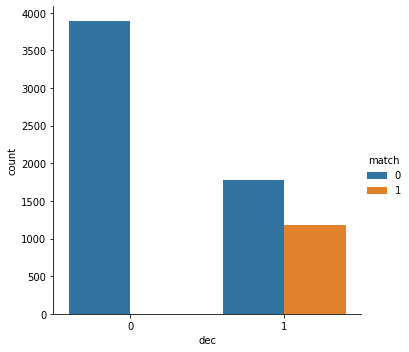

In [98]:
sns.factorplot('dec', data=df1, hue = 'match', kind = 'count')

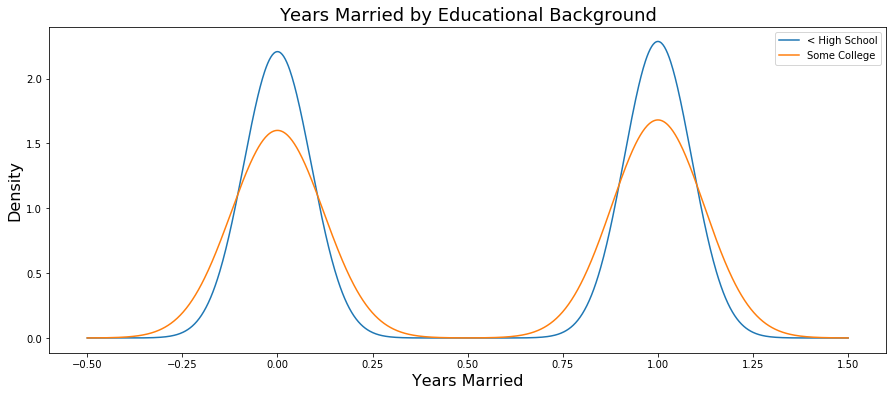

In [102]:
plot1 = df1['gender'][df1['match']== 0].plot.kde(figsize=(15,6))
plot2 = df1['gender'][df1['match']== 1].plot.kde(figsize=(15,6))
# Note this function is called simply to add graph labels in this instance
# Add legend identifying the different curves
plt.legend(('< High School', 'Some College'),loc='best') 
plotting("Years Married", "Density", "Years Married by Educational Background", plot1 )

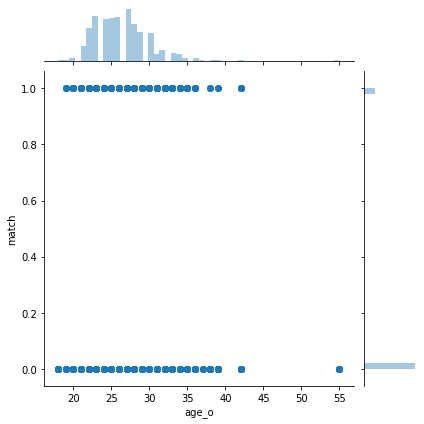

In [24]:
sns.jointplot(x='age_o', y='match', data=df1)

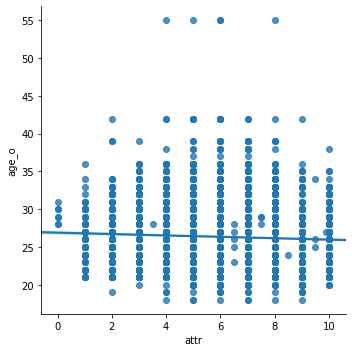

In [27]:
sns.lmplot(x='attr', y='age_o', data=df1)

In [112]:

from sklearn.model_selection import train_test_split, GridSearchCV

x = df1.drop('match', axis=1)
y = df1['match']

# Fixing a csv import bug
for i in x.columns:
    if 'Unnamed' in i:
        del x[i]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2)

xtrain.shape

(425, 15)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score

clf = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1,9,2)}
grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(xtrain, ytrain)
clf = grid.best_estimator_

cv = cross_val_score(clf, xtrain, ytrain, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

Mean score: 0.6373577146214291
Std Dev:    0.02467595159034233


In [117]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

cv = cross_val_score(clf, xtrain, ytrain, cv=4, scoring='roc_auc')

print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

Mean score: 0.8546669604171258
Std Dev:    0.009891613267697684


In [122]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
params = {'max_depth': list(np.arange(2,13)) + [None],
         'min_samples_leaf': [1,2,3,4,5,6,7,10]}
grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(xtrain, ytrain)
clf = grid.best_estimator_

cv = cross_val_score(clf, xtrain, ytrain, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 

Mean score: 0.8336784901226408
Std Dev:    0.03200036541840427


In [119]:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
params = {'max_depth': list(np.arange(3,10)) + [None],
         'min_samples_leaf': [1,2,3],
         'n_estimators': [10,100]}
grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(xtrain, ytrain)
clf = grid.best_estimator_

cv = cross_val_score(clf, xtrain, ytrain, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

Mean score: 0.8486909745171477
Std Dev:    0.023452848345174988


In [120]:

from xgboost import XGBClassifier

clf = XGBClassifier()
params = {'max_depth': list(np.arange(2, 9)),
         'reg_lambda': np.arange(1, 2.5, .25),
         'n_estimators': [100]}
grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(xtrain, ytrain)
clf = grid.best_estimator_

cv = cross_val_score(clf, xtrain, ytrain, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 

Mean score: 0.8442773738708967
Std Dev:    0.025646290570052462


In [121]:
from xgboost import XGBClassifier

clf = XGBClassifier()
params = {'max_depth': list(np.arange(2,5)),
         'reg_lambda': np.arange(1, 1.5, .1),
         'n_estimators': [100, 200, 300]}
grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(xtrain, ytrain)
clf = grid.best_estimator_

cv = cross_val_score(clf, xtrain, ytrain, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.3000000000000003, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1) 

Mean score: 0.8350462656972902
Std Dev:    0.0337489341649791


In [124]:
features_one = xtrain.values
target = ytrain.values

In [127]:
from sklearn import metrics
tree_model = DecisionTreeClassifier()
clf = tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(xtest)

accuracy = metrics.accuracy_score(dt_prediction, ytest)
print('The accuracy of the Decision Tree is',accuracy)

clf.predict(xtest)

The accuracy of the Decision Tree is 0.8504672897196262


array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [135]:

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
clf = forest.fit(features_one, target)
dt_prediction = forest.predict(xtest)
accuracy = metrics.accuracy_score(dt_prediction, ytest)
print('The accuracy of the Random Forest is',accuracy)

The accuracy of the Random Forest is 0.8785046728971962


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [134]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
clf =svc.fit(features_one, target)
dt_prediction = svc.predict(xtest)
accuracy = metrics.accuracy_score(dt_prediction, ytest)
print('The accuracy of the SVM Tree is',accuracy)

The accuracy of the SVM Tree is 0.897196261682243


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [133]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
clf =knn.fit(features_one, target)
dt_prediction = knn.predict(xtest)
accuracy = metrics.accuracy_score(dt_prediction, ytest)
print('The accuracy of the KNN  is',accuracy)

The accuracy of the KNN  is 0.9065420560747663


In [136]:
import xgboost as xgb
from xgboost import plot_importance

In [145]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(xtrain, ytrain)
training_preds = xgb_clf.predict(xtrain)
val_preds = xgb_clf.predict(xtest)
accuracy = metrics.accuracy_score(val_preds, ytest)
print('The accuracy of the XGBoost  is',accuracy)


print("\nTraining MSE:", round(mean_squared_error(ytrain, training_preds),4))
print("Validation MSE:", round(mean_squared_error(ytest, val_preds),4))
print("\nTraining r2:", round(r2_score(ytrain, training_preds),4))
print("Validation r2:", round(r2_score(ytest, val_preds),4))

The accuracy of the XGBoost  is 0.8411214953271028

Training MSE: 0.0282
Validation MSE: 0.1589

Training r2: 0.7899
Validation r2: -0.7225


In [148]:
ft_weights_xgb_clf= pd.DataFrame(xgb_clf.feature_importances_, columns=['weight'], index=xtrain.columns)
ft_weights_xgb_clf.sort_values('weight', inplace=True)
ft_weights_xgb_clf

,weight
shar,0.028232
attr,0.034353
amb,0.039067
attr1_1,0.041691
shar1_1,0.042816
fun1_1,0.043358
intel1_1,0.046472
gender,0.046880
sinc1_1,0.047765
sinc,0.048435


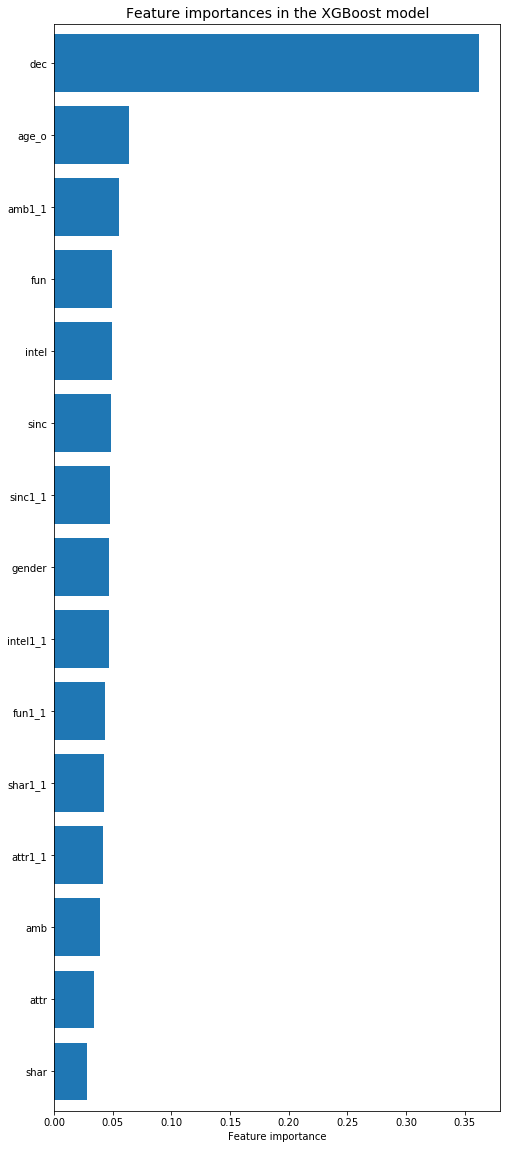

In [149]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_clf.index, ft_weights_xgb_clf.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()
